# Assignment 4

In [85]:
import numpy as np
from  scipy import ndimage
import matplotlib.pyplot as plt
import skimage as ski
from matplotlib.colors import LogNorm
from skimage import data
import skimage.color as color
eps = 0.000000000000000000000000000000000000001 #to avoid devide by zero warning

## Exercise 1: Estimation of Noise

Select a grayscale image and convert it to a float. 

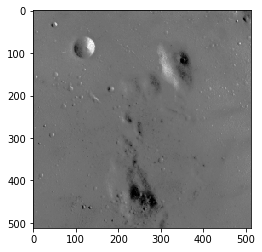

In [86]:
img = ski.util.img_as_float(data.moon())
imggr = color.rgb2gray(img)
plt.imshow(imggr, cmap='gray')

(a) Use the $\texttt{skimage.util.random$\_$noise}$ package to add the following noise distributions to the image:
* Gaussian
* Salt $\&$ Pepper
* Poisson

and display the image.

In [87]:
imggr_noise_G = ski.util.random_noise(imggr,mode='gaussian')
imggr_noise_SP = ski.util.random_noise(imggr,mode='s&p')
imggr_noise_PO = ski.util.random_noise(imggr,mode='poisson')

Text(0.5, 1.0, 'Poisson')

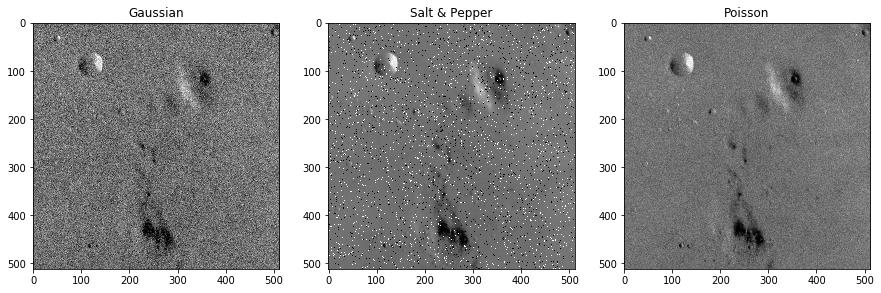

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(imggr_noise_G, cmap ='gray')
ax[0].set_title("Gaussian")
ax[1].imshow(imggr_noise_SP, cmap ='gray')
ax[1].set_title("Salt & Pepper")
ax[2].imshow(imggr_noise_PO, cmap ='gray')
ax[2].set_title("Poisson")

(b) Plot the histograms of the region of interest (ROI) with a uniform backround in the image.

Text(0.5, 1.0, 'Poisson')

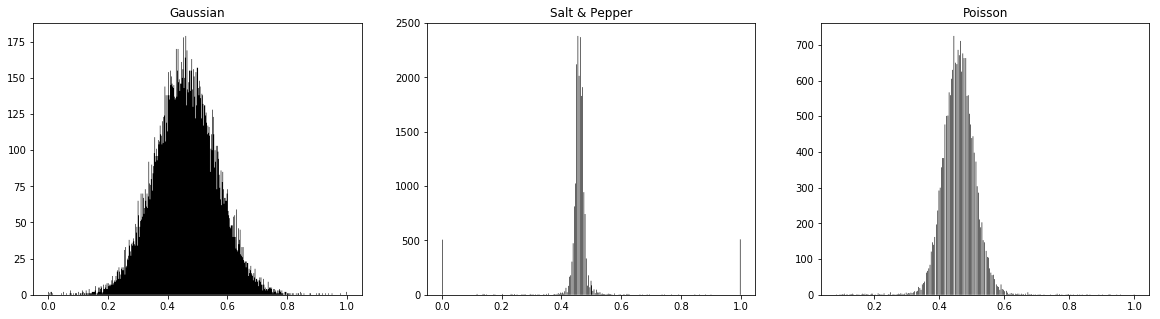

In [89]:
fig, axes = plt.subplots(1,3,figsize = (20,5))
ax = axes.ravel()

ax[0].hist(imggr_noise_G[0:200,0:100].ravel(),bins=500,histtype='stepfilled', color='black')
ax[0].set_title("Gaussian")
ax[1].hist(imggr_noise_SP[0:200,0:100].ravel(),bins=500,histtype='stepfilled',color='black')
ax[1].set_title("Salt & Pepper")
ax[2].hist(imggr_noise_PO[0:200,0:100].ravel(),bins=500,histtype='stepfilled',color='black')
ax[2].set_title("Poisson")

(c)  Estimate the mean and variance of that noise in the ROI. What is the mathematical description of the mean and variance in this case?

### Answer:
#### Estimation
With the help of $\texttt{mean}$ and $\texttt{var}$ functions in $\texttt{Numpy}$, you can find the variance and mean value of any matrix. Moreover, we have to find the array for the noise, not the image and noise together so I have subtracted the original image from the noisy image to find that and showed the absolute values because I did not know which values are bigger.

In [90]:
print ("Gaussian mean is:",np.mean(np.abs(imggr_noise_G[0:200,0:100] - imggr[0:200,0:100])))
print ("Gaussian variance is:",np.var(np.abs(imggr_noise_G[0:200,0:100] - imggr[0:200,0:100])))
print ("Salt and Pepper mean is:",np.mean(np.abs(imggr_noise_SP[0:200,0:100] - imggr[0:200,0:100])))
print ("Salt and Pepper varience is :", np.var (imggr_noise_SP[0:200,0:100] - imggr[0:200,0:100]))
print ("Poisson mean is:",np.mean(np.abs(imggr_noise_PO[0:200,0:100] - imggr[0:200,0:100])))
print ("Poisson varience is :", np.var (imggr_noise_PO[0:200,0:100] - imggr[0:200,0:100]))

Gaussian mean is: 0.08057114050093876
Gaussian variance is: 0.0036953229434134927
Salt and Pepper mean is: 0.02549470588235294
Salt and Pepper varience is : 0.012898624966974243
Poisson mean is: 0.03352495710784314
Poisson varience is : 0.0017600761640542376


#### Mathematical describtion:
Base the Table 5.1 page 214 the mathematical description of Gaussian and Salt and pepper functions are as below:

**Gaussian distribution:** Base on the formula for the Gaussian distribution function the variance and mean values are static. The default number for $\sigma^2 = b^{2}$ is 1 and $\mu\,\mathrm{(mean value) = a}$.

**Salt and pepper distribution:** for this function $\mu = (0)P_p+k(1-P_p-P_s) + (2^{n}-1)P_{s}$ and $\sigma^2=(0-m)^2P_p+(k+m)^2(1-P_p-P_s)+(2^n-1-m)^2P_s$

**Poisson distribution:** the pisson pdf function is $$Po(x)=\frac{\lambda^{x}e^{-\lambda}}{x!}$$ and with respect to Poisson article on wikipedia ([Link to the article](https://en.wikipedia.org/wiki/Poisson_distribution)) the mean and variance are both equal to $\lambda$

(d) Use the $\texttt{numpy.random}$ package and the functions therein to create the following noise distributions:
* uniform
* Lognormal
* Rayleigh

and add the noise to the image. Display the images and create the histograms of a ROI.

### Answer
First, we have to get the dimensions of your picture with $\texttt{.shape}$ function to make filter arrays with the same dimensions of original picture. After that, we make the random $\texttt{ndarrays}$ with the help of $\texttt{SciPy}$ random library. To apply the noise on the image we have to make a summation between the original image array and the noise array.

Moreover, after some try and error with $\sigma$ which stands for normal distribution of $\texttt{LogNormal}$ and $scale$ of $\texttt{Rayleigh}$ I came out with these numbers as the best result to display a visible image with the noise.

In [91]:
#get the image shape
shape = imggr.shape

#apply random functions
unifrom = np.random.uniform(1,0,shape)
logNormal = np.random.lognormal(0,0.05,shape) #mean = 0, sigma = 1 as defaults 
rayleigh = np.random.rayleigh (0.1,shape) #scale = 1 as default

Text(0.5, 1.0, 'Rayleigh')

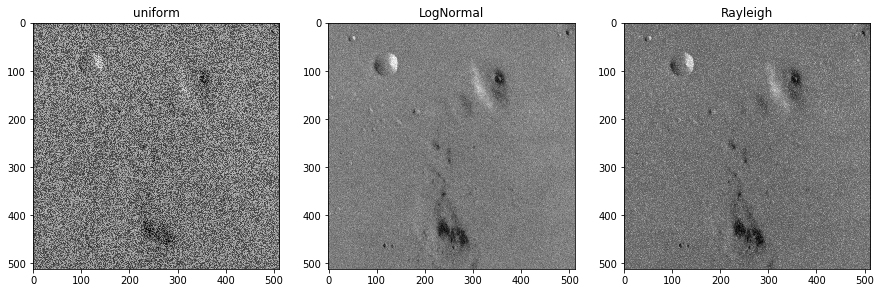

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(imggr + unifrom, cmap ='gray')
ax[0].set_title("uniform")
ax[1].imshow(imggr + logNormal, cmap ='gray')
ax[1].set_title("LogNormal")
ax[2].imshow(imggr + rayleigh, cmap ='gray')
ax[2].set_title("Rayleigh")

(e) Take the image with $\texttt{Gaussian}$ noise and apply an appropriate filter to 
remove that noise from the picture. Explain the idea behind the filter.

### Answer:
Base on page 323 section 5.3 in Digital image processing book (Gonzales 2008) the best way to filter Gaussian noise is to use Harmonic mean filter. To use this function with respect to equation 5.3-5 in the book, we have to find the $\sum g(s,t)^{-1}$ first.

To find $\sum g(s,t)^{-1}$ I used convolution method because if the mask matrix assumed as $I$ without any coefficient in any dimension, the result of convolution is $\sum g(s,t)^{-1}$. We can apply the other calculation on $\sum g(s,t)^{-1}$, later.

I used $3\times3$ mask for my filter. Thus, the $m=n=3$.

In [93]:
m = n = 3
I_3 = np.ones((3,3))
print (I_3)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [94]:
g = 1/(imggr_noise_G + eps) 
sigma_g = ndimage.convolve(g ,I_3)
f_hat = (m*n)/sigma_g

Text(0.5, 1.0, 'Original with gaussian noise')

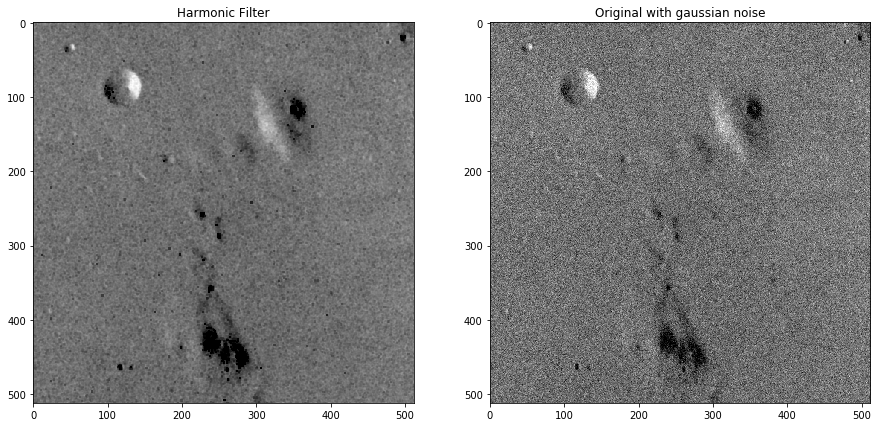

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(f_hat, cmap ='gray')
ax[0].set_title("Harmonic Filter")
ax[1].imshow(imggr_noise_G, cmap ='gray')
ax[1].set_title("Original with gaussian noise")

(f) Take the image with $\texttt{Salt $\&$ Pepper}$ noise and remove the noise with 
a suitable kernel. Try different different parameter (mask, mode, ...). Explain the idea behind the filter.  

### Answer:
Contraharmonic mean  filter is an option but it cannot filter salt and pepper simultaneously. The other option is the median filter because it only chooses the median intensity between all the neighbors in the mask and salt and pepper are minimum and maximum intensity. Thus, they never have the possibility to be a median and going to be eliminated after filter implementation.

Text(0.5, 1.0, 'Original with Salt and Pepper noise')

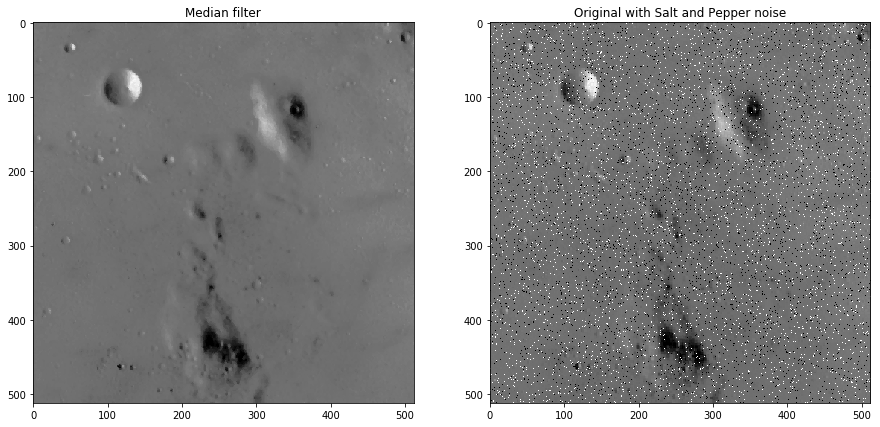

In [96]:
from skimage import filters
f = filters.median(imggr_noise_SP)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(f, cmap ='gray')
ax[0].set_title("Median filter")
ax[1].imshow(imggr_noise_SP, cmap ='gray')
ax[1].set_title("Original with Salt and Pepper noise")

## Exercise 2: Mean filter

(a)  Create an image with the following content: A black background 
with the size of $256 \times 256$ pixels. In the middle there are nine 
white stripes of 7 pixels width and 210 pixels height. The distance between the 
white stripes should be 17 pixels.

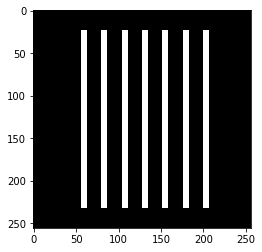

In [97]:
m_img = np.zeros((256,256))

m_img[23:233,56:63] = 1.
m_img[23:233,80:87] =1.
m_img[23:233,104:111] = 1.
m_img[23:233,128:135] = 1.
m_img[23:233,152:159] = 1.
m_img[23:233,176:183] = 1.
m_img[23:233,200:207] = 1.
plt.imshow(m_img, cmap='gray')    

(b) Filter the image using a: 
* $3\times3$ arithmetic mean filter,
* $7\times7$ arithmetic mean filter, and
* $9\times9$ arithmetic mean filter.

### Answer
Base on the definition of Arithmetic mean filter on lecture's slide page 37. You have to first make an array of ones with respect to the mask size that we want. After that, the convolution function from $\texttt{scipy.ndimage}$ is used to convolve the image with the filter.

In [98]:
def arith_mean(img,size):
    my_filter = (np.ones((size,size)))/size
    img_filtered = ndimage.convolve(img,my_filter)    
    return img_filtered

In [99]:
img_f_3by3 = arith_mean(m_img,3)
img_f_7by7 = arith_mean(m_img,7)
img_f_9by9 = arith_mean(m_img,9)

Text(0.5, 1.0, '9x9 filter')

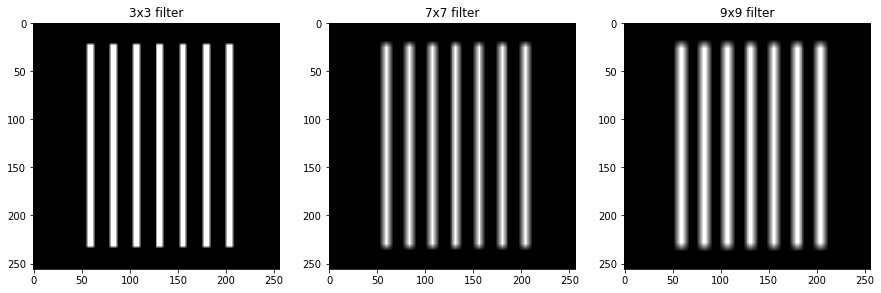

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(img_f_3by3, cmap ='gray')
ax[0].set_title("3x3 filter")
ax[1].imshow(img_f_7by7, cmap ='gray')
ax[1].set_title("7x7 filter")
ax[2].imshow(img_f_9by9, cmap ='gray')
ax[2].set_title("9x9 filter")

(c)  At what filter size are the stripes no longer clearly resolved?

### Answer:
With respect to the resulting image, with 24x24 mask the boundaries of the strips are stand next to each other without any gap. Thus, you see the strips as a whole big stripe. Therefore, with the dimensions of the mask bigger than 24 the stripes are not resolved clearly.

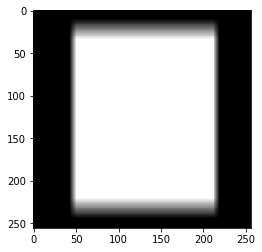

In [101]:
img_resolve = arith_mean(m_img,24)
plt.imshow(img_resolve, cmap='gray')

(d) Repeat step (b) with a geometric mean filter.

### Answer
#### First solution:
Convolution is only valid when there is a summation but the geometric mean filter is based on multiplication. Therefore, the log function is used to convert the multiplication to summation with respect to the attribute below:
$$\log{ab}=\log{a}+\log{b}$$
Then the values are changed back to their normal value with the use of log inverse function which $e^{x}$. Hence: 
$$e^{\log{x}}=x$$
Finally, the (mn)th root of the values is calculated by $\texttt{numpy.power}$ function.

In [102]:
def geo_mean(img,size):
    my_filter = (np.ones((size,size)))/size
    img_filtered = ndimage.convolve(np.log(img+eps),my_filter)
    img_filtered = np.exp(img_filtered)
    img_filtered = np.power(img_filtered,(1./size**2))
    return img_filtered

In [103]:
img_f_3by3 = geo_mean(m_img,3)
img_f_7by7 = geo_mean(m_img,7)
img_f_9by9 = geo_mean(m_img,9)

Text(0.5, 1.0, '9x9 filter')

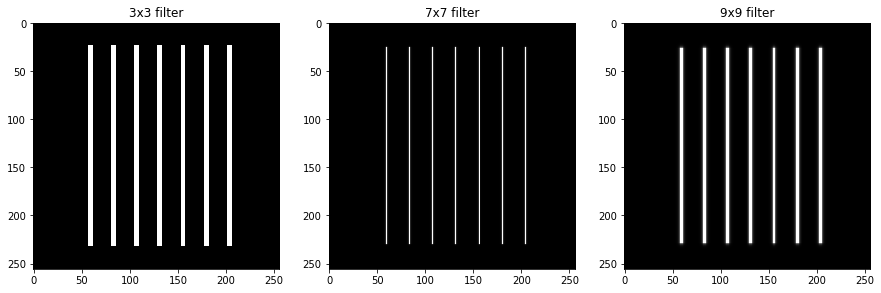

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(img_f_3by3, cmap ='gray')
ax[0].set_title("3x3 filter")
ax[1].imshow(img_f_7by7, cmap ='gray')
ax[1].set_title("7x7 filter")
ax[2].imshow(img_f_9by9, cmap ='gray')
ax[2].set_title("9x9 filter")

#### second solution:
Here the function geometric mean is called and in order to make the mask, we can use the square morphological structure from the $\texttt{skimage.morphology}$ module.

In [141]:
from skimage import morphology
sq3 = morphology.square(3)
sq7 = morphology.square(7)
sq9 = morphology.square(9)
img_f_3by3 = ski.filters.rank.geometric_mean(m_img,sq3)
img_f_7by7 = ski.filters.rank.geometric_mean(m_img,sq7)
img_f_9by9 = ski.filters.rank.geometric_mean(m_img,sq9)

/home/psalehi/anaconda3/envs/dip2019/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, '9x9 filter')

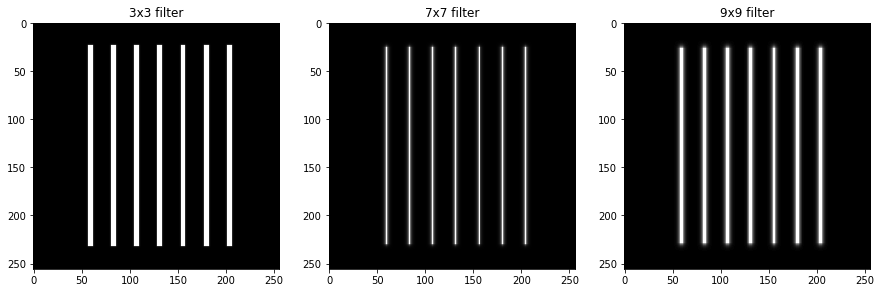

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(img_f_3by3, cmap ='gray')
ax[0].set_title("3x3 filter")
ax[1].imshow(img_f_7by7, cmap ='gray')
ax[1].set_title("7x7 filter")
ax[2].imshow(img_f_9by9, cmap ='gray')
ax[2].set_title("9x9 filter")

(e) Repeat step (b) with a harmonic mean filter.

In [131]:
def harmonic_mean(img,size):
    my_filter = (np.ones((size,size)))/size
    img_filtered = ndimage.convolve((img**-1),my_filter)
    img_filtered = (size**2/img_filtered) + eps
    return img_filtered

In [132]:
img_f_3by3 = harmonic_mean(m_img,3)
img_f_7by7 = harmonic_mean(m_img,7)
img_f_9by9 = harmonic_mean(m_img,9)

/home/psalehi/anaconda3/envs/dip2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '9x9 filter')

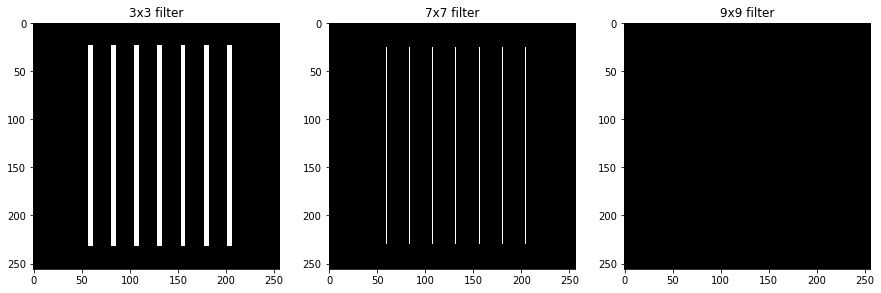

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(img_f_3by3, cmap ='gray')
ax[0].set_title("3x3 filter")
ax[1].imshow(img_f_7by7, cmap ='gray')
ax[1].set_title("7x7 filter")
ax[2].imshow(img_f_9by9, cmap ='gray')
ax[2].set_title("9x9 filter")

(f)  Describe what happens while applying the different filters to the image.

1e-39


## Exercise 3: Periodic Noise

(a) Load in the image $\texttt{moon$\_$noise.png}$ and convert the image to a float. Filter the image with a band-reject filter. Display the unfiltered image, the  image in frequency domain, the shape of the band-reject filter, an image of the noise, and the filtered image.

### Answer:
Here the ideal band-reject filter is used. Because it is more straight forward and simpler to code.

After Making the mesh gird with the same instructions from *lab3*, the band-reject filter function is introduced with a background of value 1 and ring of value 0 as below. You can find the $D0$ and $W$ with some try and error to cover the noise spots which are demonstrated in pictures. Since there are so many other noisy spots in the image there is not any chance to make the image perfect only with a band-reject filter.

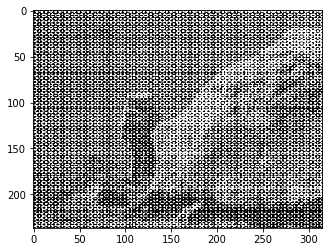

In [23]:
#to omport the image
from skimage import io
moon_noise = ski.img_as_float(io.imread('moon_noise.png'))
moon_noise = ski.util.img_as_float(moon_noise)
gr_moon_noise = color.rgb2gray(moon_noise)
plt.imshow(gr_moon_noise, cmap='gray')

In [24]:
#define BR filter
from scipy import fftpack as ft
from matplotlib.colors import LogNorm

def filter_implement (H,img):
    shift = ft.fftshift(H)
    Himg = img*shift
    reverse = ft.ifft2(Himg)
    return np.abs(reverse)

def dftuv(M,N):
    u = np.arange(0,M)
    v = np.arange(0,N)
    idx = np.where( u > (M/2) )
    idy = np.where( v > (N/2) )
    u[idx] = u[idx]-M
    v[idy] = v[idy]-N
    [V,U] = np.meshgrid(v,u)
    return(U, V)

def ideal_bpfilter(U,V,D0,W):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.ones((s[0], s[1]))
    H[np.where(D <= D0 + (W/2))]=0
    H[np.where(D <= D0 - (W/2))]=1
    return (H)

s = gr_moon_noise.shape
M = s[0]
N = s[1]
print (gr_moon_noise.shape)

(237, 315)


In [25]:
D0 =90
W = 10
[U,V] = dftuv(M, N)
brfilter = ideal_bpfilter(U,V,D0,W)

Text(0.5, 1.0, 'Filtered image')

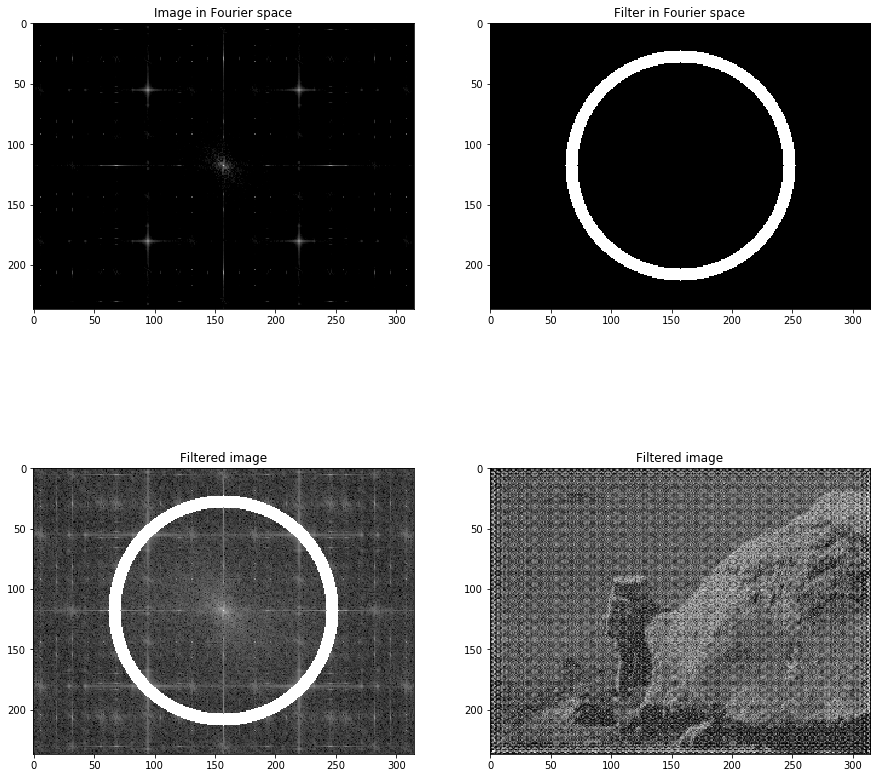

In [84]:
fft_grMoon = ft.fft2(gr_moon_noise)
sfft_grMoon = ft.fftshift(fft_grMoon)
sfft_filter = ft.fftshift(brfilter)
filtered_grMoon = sfft_grMoon * sfft_filter
ifft_grMoon = ft.ifft2(filtered_grMoon)

fig, axes = plt.subplots(2,2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(np.abs(sfft_grMoon), norm = LogNorm(vmin = 90,vmax = 100000), cmap ='gray')
ax[0].set_title("Image in Fourier space")
ax[1].imshow(np.abs(sfft_filter), norm = LogNorm(vmin = 1,vmax = 100000), cmap ='gray')
ax[1].set_title("Filter in Fourier space")
ax[2].imshow(np.abs(filtered_grMoon), norm = LogNorm(vmin = 1,vmax = 100000), cmap ='gray')
ax[2].set_title("Filtered image")
ax[3].imshow(np.abs(ifft_grMoon), cmap ='gray')
ax[3].set_title("Filtered image")

## Exercise 4: Wiener Filter

(a) Define a point spread function (PSF) and convolve the PSF with an grayscale image of your choice to create a blured image. Explain what the PSF is.

### Aswer:
The mean filter with the mask of 5x5 is assumed as the PSF function. The noise which has added is Gaussian and after some try and error, Wiener filter with $K = 1.5$ makes the best result. $K$ is the ratio between the power spectrum of noise and undegraded image - [scikit-image documentation](https://scikit-image.org/docs/stable/api/skimage.filters.html#wiener).

In [161]:
img = ski.util.img_as_float(data.chelsea())
imggr = color.rgb2gray(img)
psf = np.ones((5, 5)) / 25
psf_imggr = ndimage.convolve(imggr,psf)

Text(0.5, 1.0, 'PSF Convolved')

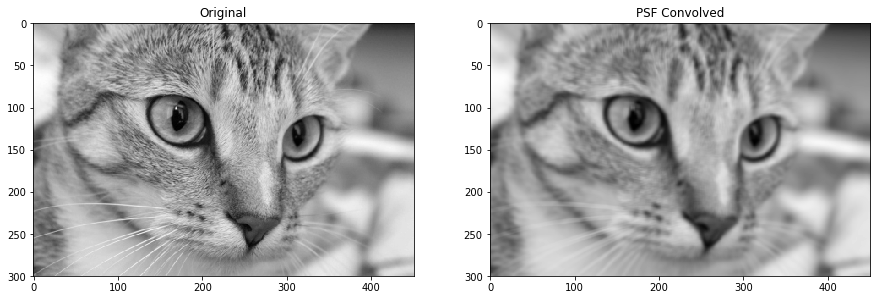

In [162]:
fig, axes = plt.subplots(1,2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(imggr, cmap ='gray')
ax[0].set_title("Original")
ax[1].imshow(psf_imggr, cmap ='gray')
ax[1].set_title("PSF Convolved")

(b) Add an additive noise to the image.

In [163]:
psfAndNoise_imggr = ski.util.random_noise(psf_imggr,mode='gaussian')

Text(0.5, 1.0, 'PSF+Noise Convolved')

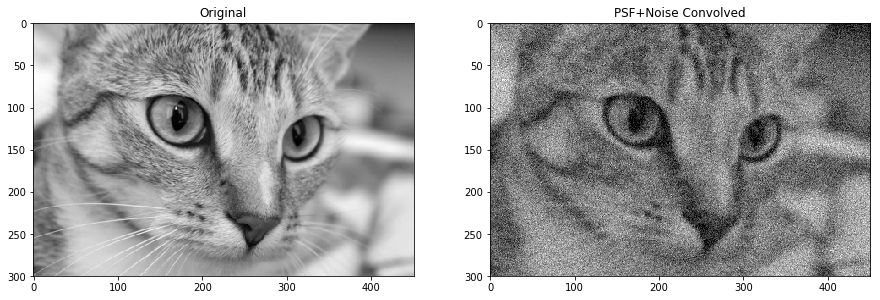

In [164]:
fig, axes = plt.subplots(1,2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(imggr, cmap ='gray')
ax[0].set_title("Original")
ax[1].imshow(psfAndNoise_imggr, cmap ='gray')
ax[1].set_title("PSF+Noise Convolved")

(c) Apply a $\texttt{Wiener Filter}$ to restore the image.

Text(0.5, 1.0, 'Wierner filter')

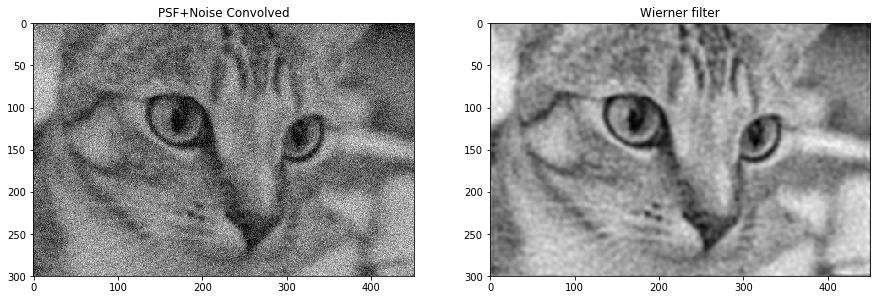

In [165]:
wiener_imggr = ski.restoration.wiener(psfAndNoise_imggr,psf,1.5)

fig, axes = plt.subplots(1,2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(psfAndNoise_imggr, cmap ='gray')
ax[0].set_title("PSF+Noise Convolved")
ax[1].imshow(wiener_imggr, cmap ='gray')
ax[1].set_title("Wierner filter")

## Exercise 5: Geometrical transformation

Align the Targets $\texttt{target2.jpg}$ to $\texttt{target1.jpg}$ using geometrical transformations, i.e., rotation, translation, reflection.

##  Exercise 6: Theoretical Questions

(a) How to estimate the type of noise in an image?

The histogram is the best way to identify the shape of a noise.

(b) Which filters are appropriate for:
* Gaussian noise,
* Periodic noise, and
* Salt $\&$ Pepper noise;

and give examples, where such noise can be introduced into images.

**Gaussian:** **filter:** Harmonic mean filter, **Example:** Electronic circuits

**Periodic noise:** **filter:** bandreject filter, **Example:** Arises typically from electrical or electromechanical Interference

**Salt and papper:** **filter:** median filter, **Example:** noise from cosmic rays






(c)  Describe differences between "white", "pink", and "brown" noise? 
Are there applications were noise is helpful?

**white noise:** is a random signal having equal intensity at different frequencies, giving it a constant power spectral density. *Application:* can be used to produce a "non-white" random vector (that is, a list of random variables) whose elements have a prescribed covariance matrix.

**Pink noise:** is a signal or process with a frequency spectrum such that the power spectral density (energy or power per frequency interval) is inversely proportional to the frequency of the signal. Pink noise is the most common signal in biological systems. *Application:* often used to test and equalize loudspeakers in rooms and auditoriums.

**Brown noise:** In science, Brownian noise , also known as Brown noise or red noise, is the kind of signal noise produced by Brownian motion, hence its alternative name of random walk noise. The term "Brown noise" does not come from the color, but after Robert Brown, the discoverer of Brownian motion.It is strong in longer wavelengths, similar to the red end of the visible spectrum.

(d) An astronomer working with a large-scale telescope observes that the 
recorded images are a little blurry. The manufacturer tells the astronomer that 
the unit is operating within specifications. The telescope lenses focus images 
onto a high-resolution CCD imaging array, and the images are then converted into digital images. Trying to improve the situation by conducting controlled lab 
experiments with the lenses and imaging sensors is not possible due to the size 
and weight of the telescope components. The astronomer ask you, the digital 
image processing expert, for help to formulate a digital image processing 
solution for sharpening the images a little more. How would you go about solving this problem, given that only images you can obtain are images of stellar 
bodies? 

(Hint: Lecture)